In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
from sklearn.datasets import fetch_california_housing
california_df=fetch_california_housing()

In [10]:
california_df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [18]:
df.shape

(5160, 9)

In [11]:
df=pd.DataFrame(california_df.data,columns=california_df.feature_names)
df['Target']=california_df.target
df=df.sample(frac=0.25)

In [14]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [19]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
2559,1.7500,50.0,4.096386,0.891566,235.0,2.831325,40.81,-124.15
8321,2.0000,31.0,3.894376,1.086420,2390.0,3.278464,33.95,-118.29
1036,3.9107,40.0,6.500000,1.149533,546.0,2.551402,38.43,-120.79
5052,1.7945,37.0,4.502623,1.156348,1941.0,2.036726,34.01,-118.34
16416,0.9614,28.0,5.300000,1.014286,171.0,2.442857,37.90,-121.28


In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [27]:
from sklearn.tree import DecisionTreeRegressor
r1=DecisionTreeRegressor()

In [29]:
r1.fit(X_train,y_train)

DecisionTreeRegressor()

In [30]:
y_pred=r1.predict(X_test)

In [31]:
y_pred

array([1.221, 0.983, 4.987, ..., 0.713, 0.938, 0.95 ])

In [33]:
from sklearn.metrics import r2_score
score=r2_score(y_pred,y_test)

In [34]:
score

0.46682000053240724

In [35]:
## Hyperparameter Tunning
parameter={
 'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5,6,7,8,10,11,12],
  'max_features':['auto', 'sqrt', 'log2']
    
}
regressor=DecisionTreeRegressor()

In [36]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
regressorcv=GridSearchCV(regressor,param_grid=parameter,cv=2,scoring='neg_mean_squared_error')

In [37]:
regressorcv.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [38]:
regressorcv.best_params_

{'criterion': 'poisson',
 'max_depth': 6,
 'max_features': 'auto',
 'splitter': 'best'}

In [39]:
regressor=DecisionTreeRegressor(criterion='absolute_error',max_depth=7,max_features='auto',splitter='best')

In [40]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=7,
                      max_features='auto')

In [41]:
%matplotlib inline

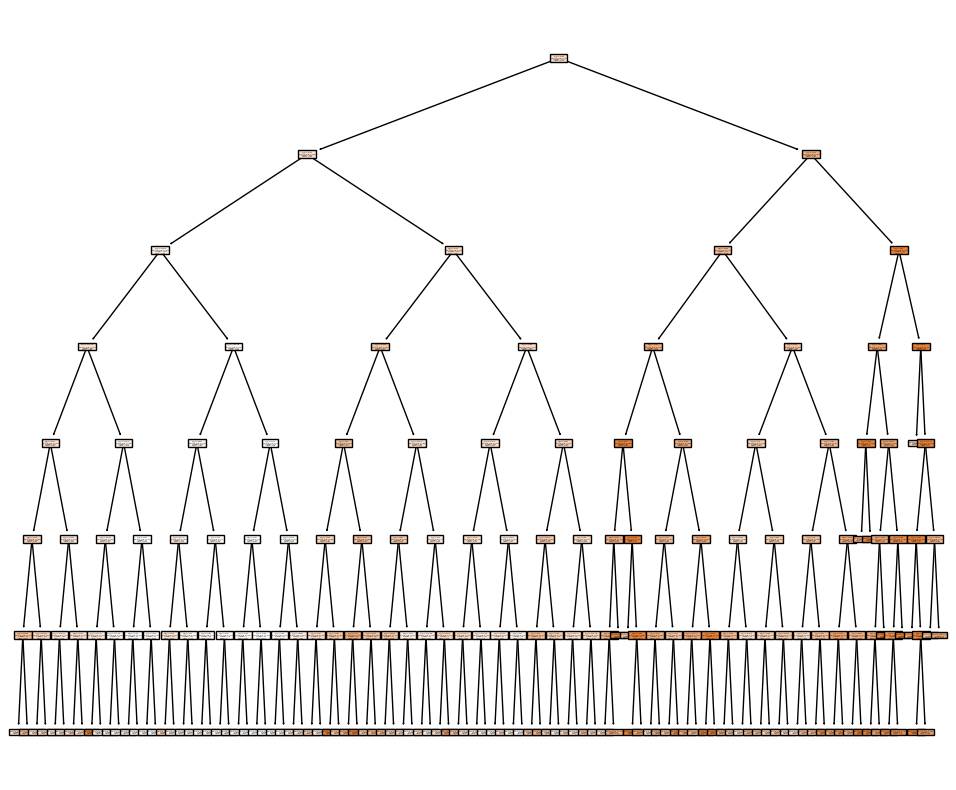

In [42]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(regressor,filled=True)
plt.show()

In [44]:
y_pred=regressorcv.predict(X_test)

In [45]:
y_pred=regressorcv.predict(X_test)

In [46]:
y_pred

array([1.88598537, 1.18567447, 2.353     , ..., 2.136     , 1.01676   ,
       1.28088496])